In [4]:
import requests
import bs4
import re
from bs4 import BeautifulSoup
import math
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [18, 12]

# Retrieve Job Description Data from Indeed.com

First, in order to ignore fuzzy matches from our job searches, we only focused on jobs that had the following word phrases in its job title:
1. data scientist
2. quantitative analyst
3. statistician
4. data analyst
5. research scientist
6. machine learning engineer
7. data engineer

In [2]:
base_url = ''

# Declare job titles to search on indeed.com
titles = [{
    'title': 'data scientist',
    'urltitle': 'data+scientist'
}, {
    'title': 'quantitative analyst',
    'urltitle': 'quantitative+analyst'
}, {
    'title': 'statistician',
    'urltitle': 'statistician'
}, {
    'title': 'data analyst',
    'urltitle': 'data+analyst'
}, {
    'title': 'research scientist',
    'urltitle': 'research+scientist'
}, {
    'title': 'machine learning engineer',
    'urltitle': 'machine+learning+engineer'
}, {
    'title': 'data engineer',
    'urltitle': 'data+engineer'
}]

## Retireve Job Descriptions from provided job urls

In [3]:
# Function to retireve Job Description from provided job url
def storedescription(term, url):
    try:
        r = requests.get('https://www.indeed.com'+url)
        soup = BeautifulSoup(r.text, 'html.parser')
        description = soup.find('div', id="jobDescriptionText").get_text()
        jobdescription.append(description)
    except Exception as e:
        print(f'description error: {e}')
        jobdescription.append("")

In [4]:
# Lists to hold retrieved values
jobtitles = []
urls = []
jobclass = []
jobdescription = []

# search by job title
for term in titles:
    startlen = len(urls)
    try:
#         r = requests.get('https://www.indeed.com/jobs?q={}&l=NJ&sort=date&limit=50'.format(term['urltitle']))
        r = requests.get('https://www.indeed.com/jobs?q={}&l=New+York%2C+NY&sort=date&limit=50'.format(term['urltitle']))
        soup = BeautifulSoup(r.text, 'html.parser')
        count_str = soup.find('div', id="searchCountPages").get_text()
        max_results = int(count_str.split()[3].replace(',', ''))

        # calculate how many pages we need to query
        max_results = math.ceil(max_results/50)
        time.sleep(1)
    except Exception as e:
        print(f'title error: {e}') 

    print('Querying {} pages for {}'.format(max_results, term['title']))
    for x in range(0, max_results):

        try:
            split = '&start='+format(x*50)
#             html = requests.get('https://www.indeed.com/jobs?q={}&l=NJ&sort=date&limit=50+{}'.format(term['urltitle'], split))
            html = requests.get('https://www.indeed.com/jobs?q={}&l=New+York%2C+NY&sort=date&limit=50+{}'.format(term['urltitle'], split))
            soup = BeautifulSoup(html.text, 'html.parser')
            for link in soup.findAll('a'):
                try:
                    # only retireve urls from matching titles
                    if term['title'].lower() in link.attrs['title'].lower():
                        jobtitles.append(link.attrs['title'])
                        urls.append(link.attrs['href'])
                        jobclass.append(term['title'])
                        storedescription(term['title'], link.attrs['href'])
                        
                except Exception as e:
                    print(f'{x} attribute link error: {e}') 
            time.sleep(1)
        except Exception as e:
            print(f'link error: {e}')

    print('.. found {} results for {}'.format(len(urls)-startlen, term['title']))

Querying 11 pages for data scientist
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 a

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribu

.. found 10 results for quantitative analyst
Querying 1 pages for statistician
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: '

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribute link error: 'title'
13 attribu

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attrib

5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attrib

8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribu

16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribute link error: 'title'
16 attribu

18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribute link error: 'title'
18 attribu

19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribu

21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribu

23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribu

25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribu

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribu

15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribu

17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribu

19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribu

20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribute link error: 'title'
20 attribu

21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribu

22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribute link error: 'title'
22 attribu

24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribute link error: 'title'
24 attribu

25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribu

26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribute link error: 'title'
26 attribu

27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribu

29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribu

30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribute link error: 'title'
30 attribu

32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribute link error: 'title'
32 attribu

33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribu

34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribute link error: 'title'
34 attribu

35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribu

36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribute link error: 'title'
36 attribu

38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribute link error: 'title'
38 attribu

39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribute link error: 'title'
39 attribu

40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribute link error: 'title'
40 attribu

41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribute link error: 'title'
41 attribu

42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribute link error: 'title'
42 attribu

44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribute link error: 'title'
44 attribu

45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribute link error: 'title'
45 attribu

46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribute link error: 'title'
46 attribu

47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribute link error: 'title'
47 attribu

48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribute link error: 'title'
48 attribu

50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribute link error: 'title'
50 attribu

51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribute link error: 'title'
51 attribu

52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribute link error: 'title'
52 attribu

53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribute link error: 'title'
53 attribu

54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribute link error: 'title'
54 attribu

56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribute link error: 'title'
56 attribu

57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribute link error: 'title'
57 attribu

58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribute link error: 'title'
58 attribu

59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribute link error: 'title'
59 attribu

61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribute link error: 'title'
61 attribu

62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribute link error: 'title'
62 attribu

63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribute link error: 'title'
63 attribu

64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribute link error: 'title'
64 attribu

65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribute link error: 'title'
65 attribu

67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribute link error: 'title'
67 attribu

68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribute link error: 'title'
68 attribu

In [5]:
print(len(jobtitles))
print(len(urls))
print(len(jobclass))
print(len(jobdescription))

539
539
539
539


In [6]:
df = pd.DataFrame({'title': jobtitles, 'jobclass': jobclass, 'url': urls, 'jobdescription': jobdescription})
#df = pd.DataFrame({'jobdescription': jobdescription})

In [7]:
df.to_csv("../exported_data/indeed_data_nyc_raw.csv")

# Process Job Decsription Data

In [5]:
raw_df = pd.read_csv("../exported_data/indeed_data_nyc_raw.csv")
del raw_df["Unnamed: 0"]

jobtitles_raw = raw_df.title.astype(str).values.tolist()
jobclass_raw = raw_df.jobclass.astype(str).values.tolist()
urls_raw = raw_df.url.astype(str).values.tolist()
jobdescription_raw = raw_df.jobdescription.astype(str).values.tolist()

print("Jobtitles: " + str(len(jobtitles_raw)))
print("URLS: " + str(len(urls_raw)))
print("Job Classes: " + str(len(jobclass_raw)))
print("Job Descriptions: " + str(len(jobdescription_raw)))

Jobtitles: 539
URLS: 539
Job Classes: 539
Job Descriptions: 539


In [6]:
raw_df.dtypes

title             object
jobclass          object
url               object
jobdescription    object
dtype: object

In [7]:
raw_df['title'].value_counts()

Data Engineer                                  124
Data Engineer (Remote)                          48
Big Data Engineer                               48
Senior Data Engineer                            48
Sr. Data Engineer - HBO Max                     48
                                              ... 
Data Analyst I-MSH/SSVS/ELM                      1
AVP Quantitative Analyst                         1
Data Scientist - Machine Learning                1
Junior Research Scientist                        1
Data Engineer: Bloomingdale's, New York, NY      1
Name: title, Length: 148, dtype: int64

In [8]:
raw_df['jobclass'].value_counts()

data engineer                363
data scientist                68
data analyst                  66
research scientist            23
quantitative analyst          10
machine learning engineer      7
statistician                   2
Name: jobclass, dtype: int64

In [9]:
def preprocess(line):
    line = line.replace('\n', ' ') # newlines
    line = line.replace('(', ' ')
    line = line.replace(')', ' ')
    line = line.replace('[', ' ') 
    line = line.replace(']', ' ')
#     line = line.replace('.', ' ')
#     line = line.replace(',', ' ')
#     line = line.replace('&', ' ')
    line = line.replace(' - ', ' ')
    line = line.replace(':', ' ') # We dont need summaries, just give me tokens
    line= line.replace('\t', ' ') #tabs
    
    # converts line endings in a way that stops the accidental camelcasing
    # but leaves terms like SAP intact
    line= re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', line)
    
    # regex to address the issue of text continuing directly after a period
    # instead of a space
    line = re.sub(r'\.(?! )', '. ', re.sub(r' +', ' ', line))
    return line

In [10]:
raw_df["jobdescription"][10]

"Role:· This is a 3-6 month full-time data scientist contract position with potential to become permanent position based on the performance.· Reporting to the Project Manager, focusing on exploratory data analysis and A/B testing for a live beauty product recommendations engine.· You’ll explore the rich behaviour data collected as people shop using our recommendations and the results from our A/B tests.· You’ll work closely with our technical and product teams to come up with questions and hypotheses about what’s working or could be improved, you’ll help design and interpret future A/B tests, and so you’ll help guide our product roadmap for improving the algorithm.Requirements:· You have expertise in exploratory data analysis and visualisation (e.g. with SQL, Python/Pandas, R, or similar).· You love using data to answer high-level questions about how people use a product.· MS or PhD in computer science, data mining, machine learning, statistics, math, engineering, operations research, 

In [11]:
# jobdescription = df.jobdescription
description = [preprocess(d) for d in jobdescription_raw]

len(description)

539

In [12]:
description[10]

"Role · This is a 3-6 month full-time data scientist contract position with potential to become permanent position based on the performance. · Reporting to the Project Manager, focusing on exploratory data analysis and A/B testing for a live beauty product recommendations engine. · You’ll explore the rich behaviour data collected as people shop using our recommendations and the results from our A/B tests. · You’ll work closely with our technical and product teams to come up with questions and hypotheses about what’s working or could be improved, you’ll help design and interpret future A/B tests, and so you’ll help guide our product roadmap for improving the algorithm. Requirements · You have expertise in exploratory data analysis and visualisation e. g. with SQL, Python/Pandas, R, or similar . · You love using data to answer high-level questions about how people use a product. · MS or Ph D in computer science, data mining, machine learning, statistics, math, engineering, operations res

In [13]:
processed_df = pd.DataFrame({'title': jobtitles_raw, 'jobclass': jobclass_raw, 'url': urls_raw, 'jobdescription': description})
#processed_df = pd.DataFrame({'jobdescription': description})

In [14]:
processed_df.to_csv("../exported_data/indeed_data_nyc_processed.csv")

# Find Words Counts from Processed Descriptions

In [15]:
postprocessed_df = pd.read_csv("../exported_data/indeed_data_nyc_processed.csv")
del postprocessed_df["Unnamed: 0"]

jobtitles_post = postprocessed_df.title.astype(str).values.tolist()
jobclass_post = postprocessed_df.jobclass.astype(str).values.tolist()
urls_post = postprocessed_df.url.astype(str).values.tolist()
jobdescription_post = postprocessed_df.jobdescription.astype(str).values.tolist()

print("Jobtitles: " + str(len(jobtitles_post)))
print("URLS: " + str(len(urls_post)))
print("Job Classes: " + str(len(jobclass_post)))
print("Job Descriptions: " + str(len(jobdescription_post)))

Jobtitles: 539
URLS: 539
Job Classes: 539
Job Descriptions: 539


/Users/budchris/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with 

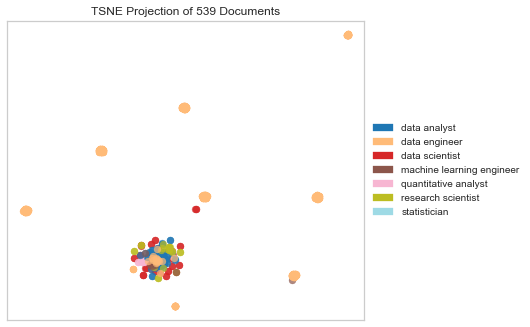

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer(stop_words='english')

X = tfidf.fit_transform(jobdescription_post)
y = jobclass_post

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(decompose_by=75, decompose='svd', colormap='tab20')
tsne.fit(X, y)
tsne.show()

In [19]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/budchris/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Initializing Dictionary
d = {}
postprocessed_df["jobdescription_split"] = postprocessed_df["jobdescription"].astype(str).str.lower().str.split()

p_description = postprocessed_df["jobdescription_split"].apply(lambda x: [item for item in x if item not in stop])
p_description

0      [data, scientist, based, manhattan,, ny, compe...
1      [description, point, connected, solutions, bus...
2      [data, scientist, senior, consultant, remote, ...
3      [leads, participates, development,, validation...
4      [medidata, leading, digital, transformation, l...
                             ...                        
534    [reonomy, leverages, big, data,, partnerships,...
535    [job, description, looking, big, data, enginee...
536    [overview, overview, strategic, looking, data,...
537    [senior, data, engineer, within, north, americ...
538    [**we, still, hiring, interviewing, position.,...
Name: jobdescription_split, Length: 539, dtype: object

In [21]:
# counting number of times each word comes up in list of words (in dictionary)
for word_list in p_description:
    #word_list = descr.split()
    for word in word_list: 
        d[word] = d.get(word, 0) + 1

In [22]:
word_freq = []
for key, value in d.items():
    word_freq.append((value, key))

In [23]:
word_freq.sort(reverse=True) 
print(word_freq)

[(8181, 'data'), (3386, 'experience'), (1334, 'work'), (1277, 'new'), (1202, 'years'), (1202, 'business'), (937, 'team'), (811, 'tools'), (803, 'building'), (784, 'big'), (756, 'etc.'), (731, 'working'), (724, 'knowledge'), (694, 'including'), (659, 'strong'), (655, 'etl'), (654, 'preferred'), (644, 'learning'), (638, 'solutions'), (628, 'using'), (625, 'systems'), (619, 'sql'), (616, 'ability'), (614, 'engineer'), (589, 'skills'), (574, 'management'), (569, 'build'), (557, 'health'), (524, 'technical'), (522, 'machine'), (519, 'role'), (517, 'required'), (488, 'support'), (485, '&'), (481, 'use'), (477, 'across'), (470, 'analytics'), (469, 'complex'), (467, 'development'), (464, 'people'), (456, 'company'), (444, 'science'), (443, 'quality'), (441, 'hbo'), (437, 'technologies'), (430, 'teams'), (424, 'engineering'), (417, 'status,'), (415, 'within'), (393, 'warner'), (393, 'technology'), (393, 'degree'), (387, 'best'), (383, 'provide'), (380, 'one'), (378, '.'), (376, 'responsibilitie

# TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(jobdescription_raw)

In [25]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '01', '020', '0301', '049489', '05', '05375', '059', '06', '07', '08', '09', '10', '100', '10018', '10036', '100m', '105', '10b', '11', '110', '11232', '11pm', '12', '120', '128', '129', '13', '130', '130k', '136', '14', '140', '141', '145', '14623', '15', '150', '153mm', '16', '164mm', '17', '175', '178110br', '178115br', '1784', '18', '183118br', '19', '190', '1961', '1977', '1mm', '1nf', '1xr4znanwtqj3mxpottmegtt4ygwqnyrk', '20', '200', '2000', '20000dk4', '2006905', '2007', '2007814', '2007842', '2008', '2008484', '2008697', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '20200324', '2021', '2022', '209511', '21', '212', '213982br', '214', '219job', '21b', '21st', '22', '220', '225', '23', '230', '24', '248', '24x7', '25', '250', '26', '262', '264057', '27', '27001', '271', '27th', '286', '29', '2a', '30', '300', '3000', '300938241', '300945353', '3030', '306', '30mm', '30th', '31', '3154961', '31st', '32', '330', '3348', '34', '35', '

In [26]:
print(X[0,])

  (0, 1154)	0.05795691762436052
  (0, 7513)	0.035310172535427176
  (0, 224)	0.03724870681245742
  (0, 2169)	0.11108346617469388
  (0, 1568)	0.059573963661446676
  (0, 1432)	0.0609815140851697
  (0, 3140)	0.1183563199513317
  (0, 2280)	0.1183563199513317
  (0, 3867)	0.11108346617469388
  (0, 2391)	0.07797475386244115
  (0, 966)	0.1183563199513317
  (0, 1564)	0.08105724299680046
  (0, 5247)	0.07454778376698865
  (0, 4946)	0.10192075403814482
  (0, 5437)	0.10592329429982128
  (0, 1024)	0.056760670141673436
  (0, 5018)	0.05458381262779821
  (0, 6251)	0.07996981524798101
  (0, 3358)	0.11108346617469388
  (0, 2586)	0.056760670141673436
  (0, 3704)	0.033090866321339694
  (0, 307)	0.06919369579318385
  (0, 2272)	0.04447288467197622
  (0, 1818)	0.07234865801381553
  (0, 7389)	0.08621741487167306
  :	:
  (0, 4838)	0.07699213614264386
  (0, 3827)	0.03754356930636176
  (0, 6050)	0.12501799036369676
  (0, 2619)	0.08105724299680046
  (0, 7445)	0.07188124812402402
  (0, 6368)	0.059573963661446676
  (

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

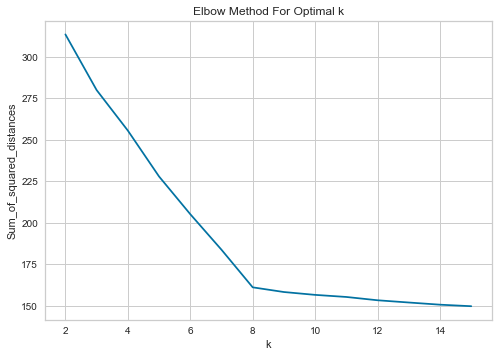

In [28]:
Sum_of_squared_distances = []
K = range(2,16)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
indeed_cl=pd.DataFrame(list(zip(jobclass_raw,labels)),columns=['title','cluster'])
print(indeed_cl.sort_values(by=['cluster']))

                    title  cluster
73   quantitative analyst        0
76   quantitative analyst        0
376         data engineer        1
355         data engineer        1
264         data engineer        1
..                    ...      ...
130          data analyst        8
129          data analyst        8
128          data analyst        8
126          data analyst        8
538         data engineer        8

[539 rows x 2 columns]


In [30]:
indeed_cl.groupby(['cluster'])['cluster'].count()

cluster
0      2
1     48
2     48
3     49
4     33
5     48
6     48
7     48
8    215
Name: cluster, dtype: int64

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/budchris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/budchris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cluster: 0
Titles:
 quantitative analyst


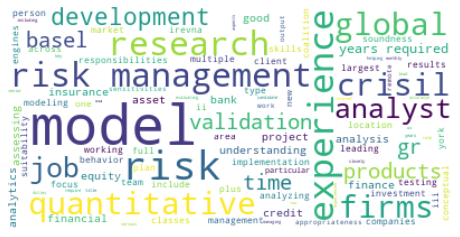

Cluster: 1
Titles:
 data engineer


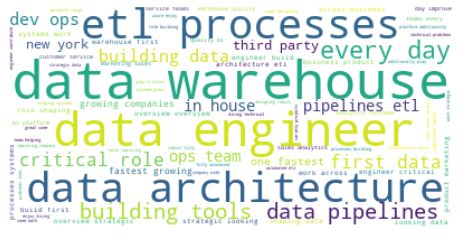

Cluster: 2
Titles:
 data engineer


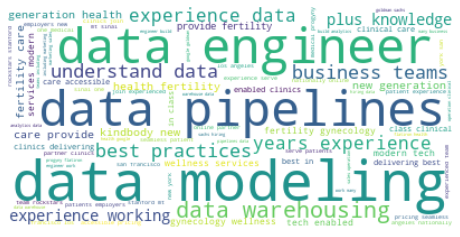

Cluster: 3
Titles:
 machine learning engineer
             data engineer


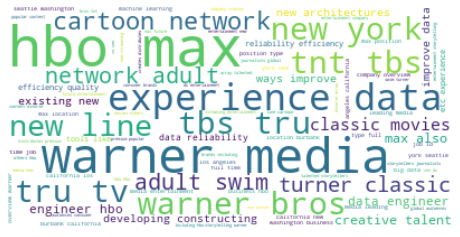

Cluster: 4
Titles:
 data engineer


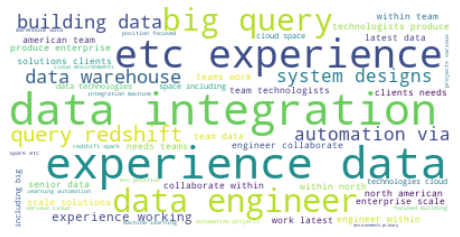

Cluster: 5
Titles:
 data engineer


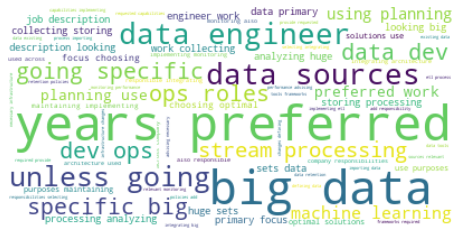

Cluster: 6
Titles:
 data engineer


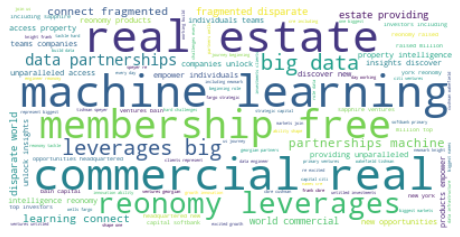

Cluster: 7
Titles:
 data engineer


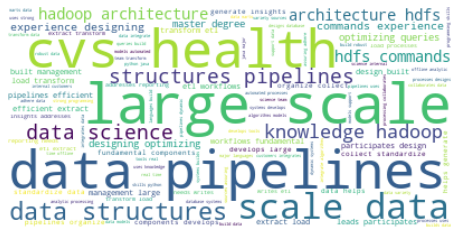

Cluster: 8
Titles:
            data scientist
      quantitative analyst
              statistician
              data analyst
        research scientist
 machine learning engineer
             data engineer


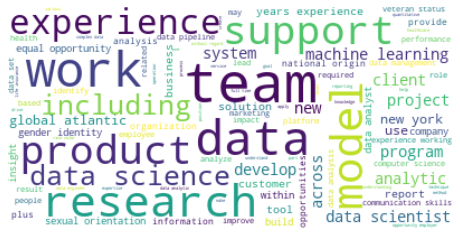

In [32]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english'))  

result={'cluster':labels,'jobclass':jobclass_post,'jobdescription':jobdescription_post}
result=pd.DataFrame(result)
for k in range(0,true_k):
# for k in range(0,1):
    s=result[result.cluster==k]
    
    text=s['jobdescription'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    text=' '.join([str(elem) for elem in filtered_sentence])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles:')
    titles=indeed_cl[indeed_cl.cluster==k]['title']
    titles=titles.drop_duplicates()
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Generating Summaries from Clusters

In [33]:
import pandas as pd
import numpy as np
import datetime
import re
from tqdm import tqdm

# preprocessing
corpus = result
corpus.loc[:,"cluster"] = corpus["cluster"].astype(str)
corpus.loc[:,"jobclass"] = corpus["jobclass"].astype(str)
corpus.loc[:,"jobdescription"] = corpus["jobdescription"].astype(str)
corpus = corpus.applymap(lambda x: x.strip())

import string
def remove_weird_letters(x):
    new_string = ""
    accepted_char = list(string.ascii_lowercase) + list(string.ascii_uppercase) + list(string.punctuation) + list(" ")
    
    for letter in x:
        for char in accepted_char:
            if char in letter:
                new_string = new_string + char
                break
    return new_string

corpus["Summary"] = corpus["jobdescription"].apply(lambda x: remove_weird_letters(x))

corpus.head(5)

,cluster,jobclass,jobdescription,Summary
0,8,data scientist,"Data Scientist Based in Manhattan, NY Competit...","Data Scientist Based in Manhattan, NY Competit..."
1,8,data scientist,Description On Point is a connected solutions ...,Description On Point is a connected solutions ...
2,8,data scientist,Data Scientist Senior Consultant Remote NOW!04...,Data Scientist Senior Consultant Remote NOW! S...
3,8,data scientist,"Leads and participates in the development, val...","Leads and participates in the development, val..."
4,8,data scientist,Medidata is leading the digital transformation...,Medidata is leading the digital transformation...


## Next, we tokenize using nltk and apply two sklearn transformers to create a spare weighted word matrix.

In [34]:
import nltk
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer #acts like a model pretty much

stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens
# initialize count vectorizer object
vect = CountVectorizer(tokenizer=tokenize)
X = vect.fit_transform(corpus["Summary"]) # [] needs to be wrapped around the string to make it a "document" if you select single element
vect.vocabulary_

from sklearn.feature_extraction.text import TfidfTransformer

# initialize tf-idf transformer object
transformer = TfidfTransformer(smooth_idf=False)
tfidf_X = transformer.fit_transform(X)

print('done')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/budchris/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


done


## Visualize PCA

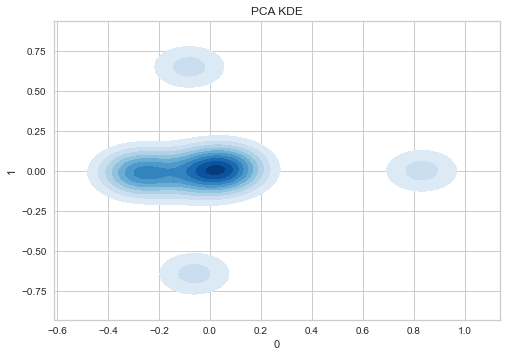

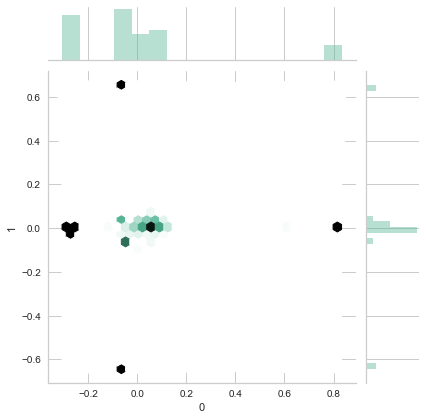

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
clust_df = pd.DataFrame(data=tfidf_X.toarray()) 
clust_df.columns = vect.vocabulary_

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(clust_df) #replace with cosine or clust_df

PCA_components = pd.DataFrame(principalComponents)
PCA_components["cluster"] = corpus["cluster"]
PCA_components["jobclass"] = corpus["jobclass"]
PCA_components["Summary"] = corpus["Summary"]
PCA_components["Size"] = 1

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.kdeplot(PCA_components[0], PCA_components[1], shade=True, cmap = 'Blues',shade_lowest=False).set(title="PCA KDE")
ax = sns.jointplot(PCA_components[0], PCA_components[1], kind="hex", color="#4CB391")

In [38]:
import time
import gensim
import gensim.downloader as api
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import Word2Vec, WordEmbeddingSimilarityIndex
from gensim.similarities import SoftCosineSimilarity, SparseTermSimilarityMatrix

fasttext = api.load('fasttext-wiki-news-subwords-300')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [39]:
# Create a soft cosine matrix

termsim_index = WordEmbeddingSimilarityIndex(fasttext.wv)

dictionary = Dictionary([simple_preprocess(doc) for doc in corpus["Summary"]]) 
bow_corpus = [dictionary.doc2bow(simple_preprocess(document)) for document in corpus["Summary"]]

similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary)
docsim_index = SoftCosineSimilarity(bow_corpus, similarity_matrix)#, num_best=10)

sims = docsim_index[bow_corpus]
cosine = pd.DataFrame(data=sims)
cosine = cosine.applymap(lambda x: round(x,4))

print(cosine.iloc[:5,:5])

/Users/budchris/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


        0       1       2       3       4
0  1.0000  0.8143  0.8203  0.7743  0.8295
1  0.8143  1.0000  0.9050  0.8424  0.9019
2  0.8203  0.9050  1.0000  0.8753  0.8795
3  0.7743  0.8424  0.8753  1.0000  0.8504
4  0.8295  0.9019  0.8795  0.8504  1.0000


## Apply the PCA to the cosine matrix instead

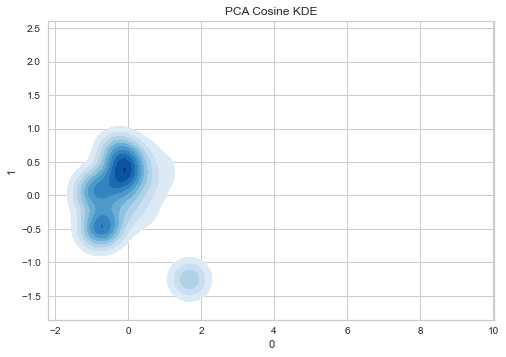

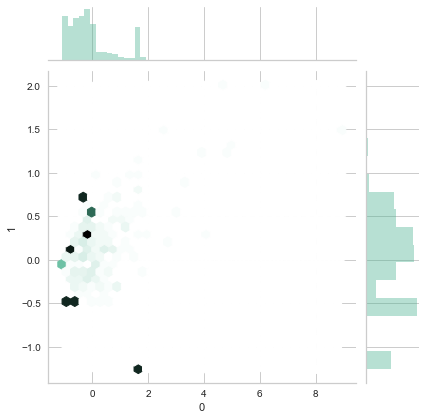

In [40]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(cosine) #replace with cosine or clust_df

PCA_components = pd.DataFrame(principalComponents)
PCA_components["Cluster"] = corpus["cluster"]
PCA_components["Jobclass"] = corpus["jobclass"]
PCA_components["Summary"] = corpus["Summary"]
PCA_components["Size"] = 1

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.kdeplot(PCA_components[0], PCA_components[1], shade=True, cmap = 'Blues',shade_lowest=False).set(title="PCA Cosine KDE")
ax = sns.jointplot(PCA_components[0], PCA_components[1], kind="hex", color="#4CB391")

## The PCA search and summarize function:

In [41]:
from gensim.summarization import summarize
from tqdm import tqdm

def area_search_function(x_min,x_max,y_min,y_max,df):
    summary = ""
    df_t = df[(df[0] > x_min) &
            (df[0] < x_max) &
            (df[1] > y_min) &
            (df[1] < y_max)]
    all_desc = df_t["Summary"]
    for desc in tqdm(all_desc):
        try:
            summary = summary + desc
        except:
            print(desc)
    return summary

# for k in range(0,true_k):
#     PCA_components_k=PCA_components[PCA_components["Cluster"]==k]

#     summary_pinpoint = area_search_function(-1,1,-0.5,.1,PCA_components_k)
#     summary_pinpoint = summarize(summary_pinpoint,word_count=200)
#     print('Cluster: {}'.format(k))
#     print(summary_pinpoint)
#     print('')

summary_pinpoint = area_search_function(-1,1,-0.5,1,PCA_components)
summary_pinpoint = summarize(summary_pinpoint,word_count=200)
print(summary_pinpoint)

100%|██████████| 390/390 [00:00<00:00, 21355.93it/s]


Below is a sampling of projects you can expect to dive into Launch surveys and message tests with the objective of using research findings to craft brand messaging guidance for various post- election scenarios Design and advise on issue-based messaging research and survey instruments for a variety of issues relevant to the ACLU, including voting rights, LGBTQ+ rights, and criminal justice reform Analyze survey, brand tracking, and other quantitative opinion research results to determine attributes about the ACLUs current donor base and potential expansion audiences Handle technical aspects of survey design, including identifying relevant survey universes and appropriate sampling frames, develop innovative sampling designs and statistical analysis procedures for complex projects and proposals, performing sample size and power calculations for complex sample surveys, and performing nonresponse bias analysis and adjustments for missing data MINIMUM QUALIFICATIONS Deep knowledge of quantit

## Structured Extraction using spaCy

In [ ]:
import spacy
import en_core_web_sm
from spacy import displacy

# load en_core_web_sm of English for vocabluary, syntax & entities
nlp = en_core_web_sm.load()

sentence= "This position will be the first of its kind at Fair Harbor and as such, the person in this role must be able and excited to take full responsibility for building out and maintaining internal tracking and reporting procedures"

processed_sentence = nlp(sentence)

displacy.render(processed_sentence, style="dep", jupyter= True)

In [ ]:
displacy.render(processed_sentence, style = "ent",jupyter = True)

## Find entity pairs and relationships

In [ ]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

def get_entities(sent):
  # credit to https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy/
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

## Network Graph Visualization

In [ ]:
entity_pairs = []

#create list with all sentences
tokens = corpus["Summary"].apply(lambda x: sent_tokenize(x))
all_sent = []
for token in tokens:
    all_sent.extend(token)

for i in all_sent:
  entity_pairs.append(get_entities(i))

relations = [get_relation(i) for i in all_sent]

top_relations=pd.Series(relations).value_counts()

# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="Provide"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()